In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, chisquare

# Exercises for 5/7 meeting

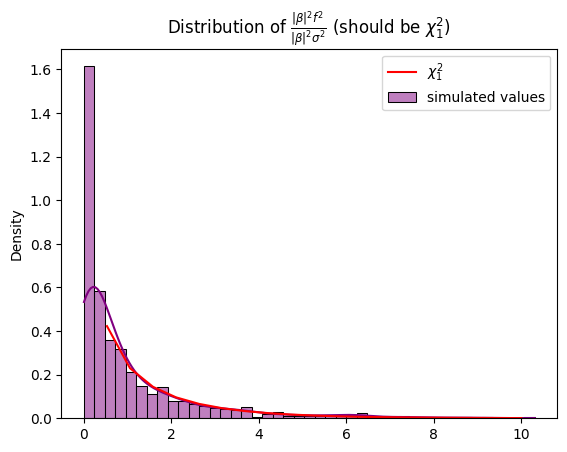

In [21]:
p = 3000 # number of features
N = 1000 # number of simulations
sigma = 3
sigma_beta = 5
# After multiple trials, what sigma you choose for the distribution of the betas and for the random varibale f does not matter 
# Therefore, it is fine to choose some default based on context

f_squared = np.random.normal(0, sigma, size = N)**2
beta = 2 * np.random.normal(0, sigma_beta, p)
b_squared = p * np.sum(beta**2)

product = f_squared * b_squared

scaled_product = (f_squared * b_squared) / (b_squared * sigma**2)

sns.histplot(scaled_product, kde = True, stat = "density", label = "simulated values", color = "purple")
x = np.linspace(0, 10, 20)
plt.plot(x, chi2.pdf(x, df=1), 'r', label=r'$\chi^2_1$')
plt.title(r'Distribution of $\frac{|β|^2 f^2}{|β|^2 \sigma^2}$ (should be $\chi^2_1$)')
plt.legend()
plt.show()

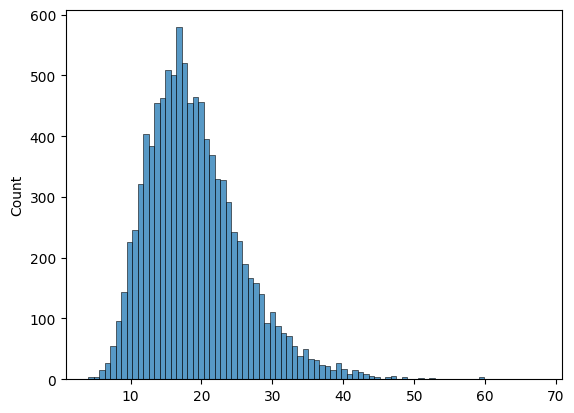

In [85]:
p_vector = range(1000, 1000000, 100)
p_values = []
chi_stats = []

for p in p_vector:
    N = 1000 # number of simulations
    sigma = 2 
    sigma_beta = 3 # these two do not really matter for the purposes of simulation
    
    f_squared = np.random.normal(0, sigma, size = N)**2
    beta = 2 * np.random.normal(0, sigma_beta, p)
    b_squared = 1/p * np.sum(beta**2)
    
    product = f_squared * b_squared
    
    scaled_product = (f_squared * b_squared) / (b_squared * sigma**2)
    
    # Define bins
    bins = np.append(np.linspace(0, 10, 20), np.inf)
    observed_counts, _ = np.histogram(scaled_product, bins)
    
    # Compute expected counts under chi^2_1 for same bins
    bin_probs = chi2.cdf(bins[1:], df=1) - chi2.cdf(bins[:-1], df=1)
    expected_counts = N * bin_probs
    
    # Perform chi-squared goodness-of-fit test
    chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    p_values.append(p_value)
    chi_stats.append(chi2_stat)
    
    # print(f"Chi-squared test statistic: {chi2_stat:.3f}")
    # print(f"P-value: {p_value:.4f}")
    
sns.histplot(chi_stats);

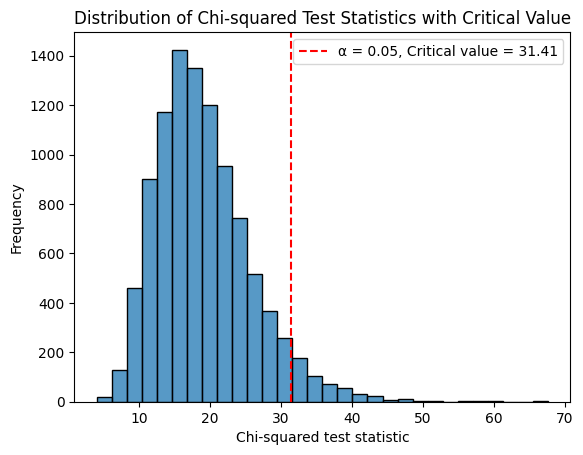

In [97]:
sns.histplot(chi_stats, bins=30, kde=False)

# Compute degrees of freedom:
#This is degrees of freedom for the Chi-squared test, which uses degrees of freedom k - 1, where k = # of bins
df = len(bins) - 1

# Critical value for α=0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)

# Add vertical line for critical value
plt.axvline(critical_value, color='red', linestyle='--', label=f'α = {alpha}, Critical value = {critical_value:.2f}')
plt.legend()
plt.xlabel("Chi-squared test statistic")
plt.ylabel("Frequency")
plt.title("Distribution of Chi-squared Test Statistics with Critical Value")
plt.show()

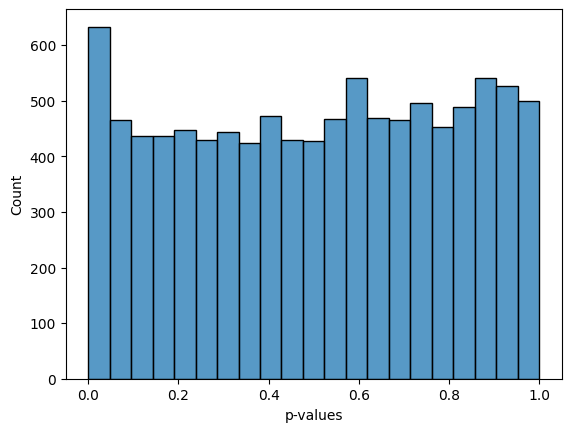

In [96]:
sns.histplot(p_values)
plt.xlabel("p-values");